In [10]:
# Loading dataset
from sklearn import datasets
import pandas as pd
import numpy as np



In [11]:
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [23]:
# Standaization==> Scaling(Standard scalar : for standardization) 
from sklearn.preprocessing import StandardScaler

dataset = df_boston
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)
#print(standardized_dataset)
#print(np.mean(standardized_dataset))
#print(np.std(standardized_dataset))

In [24]:
standardized_dataset = pd.DataFrame(standardized_dataset, columns=df_boston.columns)

standardized_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In statistics and machine learning, data standardization is a process of converting data to z-score values based on the mean and standard deviation of the data. Z_i = (x_i - mean(x))/SD(x)

In [21]:
# Normalization==> Scaling(Minmax scalar: for Normalization)
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(standardized_dataset)
normalized_dataset = scaler.transform(standardized_dataset)
#print(normalized_dataset)
#print("*"*80)
#print(np.mean(normalized_dataset)) #  Z-scale normalization
#print(np.std(normalized_dataset))
normalized_df = pd.DataFrame(normalized_dataset, columns=df_boston.columns)

normalized_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it. Normalization also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training. 

In [26]:
# Label encoder, label binarizer, one hot encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values=np.array(data)
print("Data:\n ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:" )
print(integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:")
print(onehot_encoded)



Data:
  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder:
[0 0 2 0 1 1 2 0 2 1]
OneHot Encoder:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [27]:
#Binary encode
lb = LabelBinarizer()
print("Label Binarizer:")
lb1=lb.fit_transform(values)
print(lb1)

Label Binarizer:
[[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Label Encoder: The categorical values are labeled into numeric values by assigning each category to a number.

One-hot Encoding: A column with categorical values is split into multiple columns.

Label Encoder: Different columns are not added. Rather different categories are converted into numeric values. So fewer computations.

One-hot Encoding: It will add more columns and will be computationally heavy

Label Encoder: Unique information is there

One-hot Encoding: Redundant information is there

Label Encoder: Different integers are used to represent data

One-hot Encoding: Only 0 and 1 are used to represent data

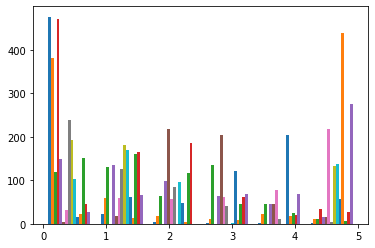

In [32]:
# discretization transform the  data
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
kbins = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(df_boston)
pyplot.hist(data_trans, bins=6)
pyplot.show()

Data discretization is the process of converting continuous data into discrete buckets by grouping it. Discretization is also known for easy maintainability of the data. Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data. Although continuous-valued data contains more information, huge amounts of data can slow the model down. Here, discretization can help us strike a balance between both. Some famous methods of data discretization are binning and using a histogram. Although data discretization is useful, we need to effectively pick the range of each bucket, which is a challenge.

The main challenge in discretization is to choose the number of intervals or bins and how to decide on their width.

In [33]:
df_boston['binned']=pd.cut(x=df_boston['AGE'], bins=[0,18,36,54,72,100],labels = [0, 1, 2,3,4])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,binned
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3


In [39]:
# Feature selection ==> Removing features with low variance
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#fsel1=sel.fit_transform(data_trans)
#fsel_df1 = pd.DataFrame(fsel1)
#fsel_df1.head()

In [40]:

fsel_data = sel.fit_transform(df_boston)
fsel_df = pd.DataFrame(fsel_data)
fsel_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4.0
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3.0
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.0
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.0


In [36]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,binned
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3


Removing features with low variance
VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. threshold=(.8 * (1 - .8) means if variance is 0 for 80% of samples then those values will be removed.

Columns "CHAS", "NOX" removed by variance threshold feature selection as >80% of their samples had variance 0.


Feature Extraction (PCA,LDA) : ==> cancer dataset


In [53]:
# loading dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
#  Standaization==> Scaling(Standard scalar : for standardization) 
from sklearn.preprocessing import StandardScaler

dataset = df
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)

In [71]:
# Feature extraction ==> PCA
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
X_r=pca.fit_transform(standardized_dataset)
#pyplot.scatter(X_r[:,0],X_r[:,1],X_r[:,2]) # scatterplot PCA
#pyplot.show()

Text(0, 0.5, 'Second Principal Component')

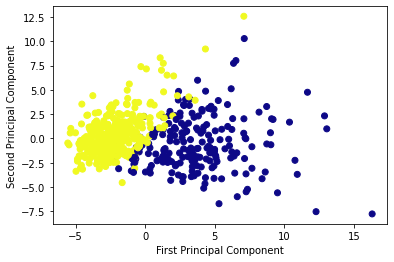

In [73]:
plt.scatter(X_r[:,0],X_r[:,1], c = cancer['target'], cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [76]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

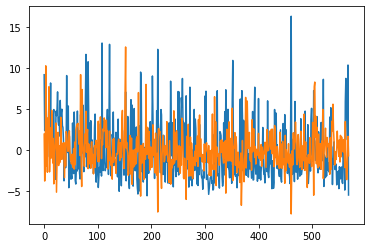

In [77]:
# line plot PCA
pyplot.plot(X_r[:,0])
pyplot.plot(X_r[:,1])


pyplot.show()

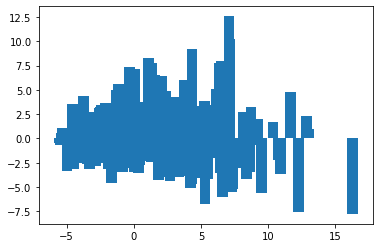

In [79]:
# Barchart PCA
pyplot.bar(X_r[:,0],X_r[:,1])

pyplot.show()

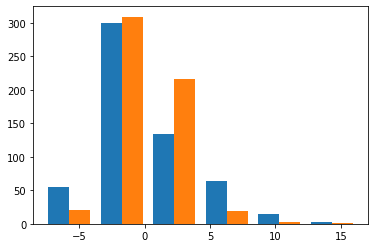

In [83]:
# Histogram PCA
pyplot.hist(X_r, bins=6)
pyplot.show()

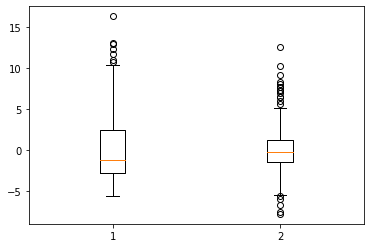

In [81]:
# boxplot PCA
pyplot.boxplot(X_r)
pyplot.show()